<h2><B><left>Hello, This Notebook Contains Machine-Learning Service To Training Multioutput Regression Model.</left></B></h2>
<h4><I><left>- the produced model is a piece of complement project named(Reactions Prediction).</left></I></h4>
<h4><I><left>- We use multioutput regression technique to predict all values by one model insted of train one model per category (there is also mathmatical reasons beyond using it).</left></I></h4>
<h4><I><left>- We use Scikit-Learn library for training and testing models.</left></I></h4>
<h4><I><left>- We implement different techniques for feature selection, and we use Grid_Search technique for parameters tunning.</left></I></h4>
<h4><I><left>- Finally we export the best model into .pickle file</left></I></h4>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
            <li><h3>Contents:</h3></li>
   <ul>
        <li><h4><a href="#exploratory">Data Exploratory.</a></h4></li>
        <li><h4><a href="#prep">Prepocessing.</a></h4></li>
        <li><h4><a href="#model">Modeling.</a></h4></li>
        <li><h4><a href="#results">Results:</a></h4></li>
         <ul>
            <li><a href="#mse">compute MSE for multioutput</a></li>
            <li><a href="#plot">Plot MSE</a></li>
        </ul>
       <li><h4><a href="#export">Exporting Model:</a></h4></li>
         <ul>
            <li><a href="#save">save into pickle</a></li>
            <li><a href="#test">test final models</a></li>
        </ul>
    </ul>
    </ul>
</div>
<hr>

<a id="exploratory"></a>
<h3><B><left>- Data Exploratory:</left></B></h3>
</I></h4>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Data/final_data_for_training.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,haha,sad,love,angry,wow,content,page_name,sumreactions,len_text,contentclean
0,0.018880,0.016485,0.919004,0.005107,0.024874,0.036320,0.067229,0.053180,0.035414,0.802068,...,10,12,1092,2,49,امطار خفيفة تهطل على العاصمة دمشق عدسة: Nour...,يوميات قذيفة هاون في دمشق,1165,34.0,امطار خفيفه تهطل العاصمه دمشق عدسه
1,0.216811,0.101265,0.598503,0.045050,0.057997,0.114702,0.172050,0.128007,0.062018,0.283905,...,195,1,315,0,5,. قاعدين بلا شغل وعم نقبض رواتب 🙂.. شو بدنا أح...,Lattakia Fire Brigade,516,93.0,قاعدين بلا شغل نقبض رواتب 🙂 احلى 🙃 اللاذقيه لل...
2,0.030447,0.016891,0.900710,0.006280,0.030180,0.206752,0.040202,0.006622,0.033356,0.703915,...,0,0,151,0,12,رادار البروق الآن | زخات مطر مصحوبة بالبروق بد...,Hawa Al Sham Weather هوى الشام,163,748.0,رادار البروق زخات مطر مصحوبه بالبروق بدات قليل...
3,0.235061,0.095841,0.552723,0.058444,0.060685,0.707770,0.051929,0.001277,0.007884,0.207705,...,1,19,159,0,0,الشارع يتألم .. لكنه تائه في تحديد الخيارات .....,رفيق نصرالله - المركز الدولي للاعلام والدراسات,179,193.0,الشارع يتالم لكنه تائه تحديد الخيارات عندما يت...
4,0.326689,0.039867,0.491232,0.069346,0.068692,0.082786,0.060208,0.036939,0.035118,0.755413,...,4,0,274,0,19,طـــريــقــي My Path 📖📝🎓 ... قريباً جداً 🚦,قولاً واحداً,297,19.0,طريقي 📖📝🎓 قريبا جدا
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40894,0.084735,0.034242,0.828185,0.013204,0.034781,0.273296,0.023235,0.009654,0.149272,0.527719,...,2,0,152,0,0,وحدات الهندسة في الجيش العربي السوري تواصل مها...,وزارة الدفاع في الجمهورية العربية السورية,154,210.0,وحدات الهندسه الجيش العربي السوري تواصل مهامها...
40895,0.030448,0.012030,0.910071,0.016648,0.026811,0.617037,0.026593,0.002589,0.159273,0.183709,...,10,1,256,1,4,السيد الرئيس الفريق بشار الأسد يصدر المرسوم ال...,وزارة الدفاع في الجمهورية العربية السورية,272,476.0,السيد الرئيس الفريق بشار الاسد يصدر المرسوم ال...
40896,-0.003702,0.096286,0.862396,0.012265,0.024558,0.121453,0.015373,0.009487,0.069338,0.010589,...,3,0,384,0,0,يارب بحق آذان فجر اول يام شهر شعبان اللهم اجعل...,شبكة أخبار اللاذقية L.N.N,387,130.0,يارب بحق اذان فجر يام شهر شعبان اللهم اجعل الا...
40897,0.189308,0.061007,0.666377,0.041729,0.055476,0.866783,0.047838,0.000942,0.030965,0.029825,...,20,1,963,0,3,⭕️رئيس مجلس الشعب يعلن تبلغ المجلس من قبل #الم...,شبكة أخبار اللاذقية L.N.N,987,134.0,⭕ رئيس مجلس الشعب يعلن تبلغ المجلس قبل المحكمه...


In [3]:
from sklearn.model_selection import train_test_split
def split_data(data,y_cols,test_size=0.2,drops=[]):    
    X = data.loc[:,~data.columns.isin(y_cols+drops)]
    y = data.loc[:,y_cols]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=42)
    return X_train, X_test,y_train,y_test

def split_data_copy(data,y_cols,test_size=0.2,drops=[]):    
    X = data.loc[:,~data.columns.isin(y_cols+drops)]
    y = data.loc[:,y_cols]
#     X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size,random_state=42)
    return X


def clean_data(data, not_important_columns = [], normalize_reactions=False, min_row_per_page=100, min_posts_counts=100):
    data = data[data.columns.difference(not_important_columns)].dropna()
    # clean posts under number of posts:
    data = data[data.sumreactions > min_posts_counts]
    if normalize_reactions:
        def normalization(item):
            haha = item["haha"]/item["sumreactions"]
            sad = item["sad"]/item["sumreactions"]
            love= item["love"]/item["sumreactions"]
            angry= item["angry"]/item["sumreactions"]
            wow= item["wow"]/item["sumreactions"]
            return haha, sad, love, angry, wow
        data[['haha','sad','love','angry','wow']] = data.apply(normalization, axis=1, result_type="expand")
    
    if "page_name" not in not_important_columns:
        counts = data.page_name.value_counts() 
        counts = counts[counts > min_row_per_page]
        counts_keys = list(counts.keys())
        data = data[data.page_name.isin(counts_keys)]
    return data

<a id="prep"></a>
<h3><B><left>- Preprocessing:</left></B></h3>
</I></h4>

In [4]:
not_important_columns = ["content","contentclean","page_name","len_text"]
data = clean_data(df,not_important_columns,True)

In [5]:
X_train, X_test,y_train,y_test = split_data(data,['haha','sad','love','angry','wow'],drops=['sumreactions'],test_size=0.8)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder,RobustScaler, StandardScaler, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector


ct = make_column_transformer(
   (StandardScaler(),
    make_column_selector(dtype_include=np.number)),
   (OneHotEncoder(),
    make_column_selector(dtype_include=object)))
y_normalizer = MinMaxScaler(feature_range=(0,100))

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

y_train_t = y_train
# y_normalizer.fit_transform(y_train)
y_test_t = y_test
# y_normalizer.transform(y_test)

<a id="model"></a>
<h3><B><left>- Modeling:</left></B></h3>
</I></h4>

In [7]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import SGDClassifier,LinearRegression,Ridge
model_pipline = Pipeline([
 ('classifier',RandomForestRegressor(n_estimators=9,min_samples_leaf=100))
 ])

In [8]:
model_pipline.fit(X_train ,y_train_t)

Pipeline(steps=[('classifier',
                 RandomForestRegressor(min_samples_leaf=100, n_estimators=9))])

<a id="results"></a>
<h3><B><left>- Results:</left></B></h3>
<a id="mse"></a>
<h4><I><left>- compute Mean Squared Error on all classes.</left></I></h4>

In [9]:
from sklearn.metrics import mean_squared_error

test_predicted = model_pipline.get_params()['classifier'].predict(X_test)
train_predicted = model_pipline.get_params()['classifier'].predict(X_train)



# compute MSE for every class:
mse_test = mean_squared_error(y_test_t,test_predicted,multioutput='raw_values')
mse_train = mean_squared_error(y_train_t,train_predicted,multioutput='raw_values')
print("MSE Train: {:}\nMSE Test: {:}\n".format(mse_train,mse_test))


# mean of 3 result values:
print('Train Error {:.3f}, Test Error{:.3f}'.format(np.mean(mse_train),np.mean(mse_test))) 

MSE Train: [0.03405639 0.01883734 0.03756915 0.00983142 0.00645736]
MSE Test: [0.035924   0.01918413 0.03855131 0.01039039 0.00664676]

Train Error 0.021, Test Error0.022


<a id="plot"></a>
<h4><I><left>- plot MSE using pyplot.</left></I></h4>

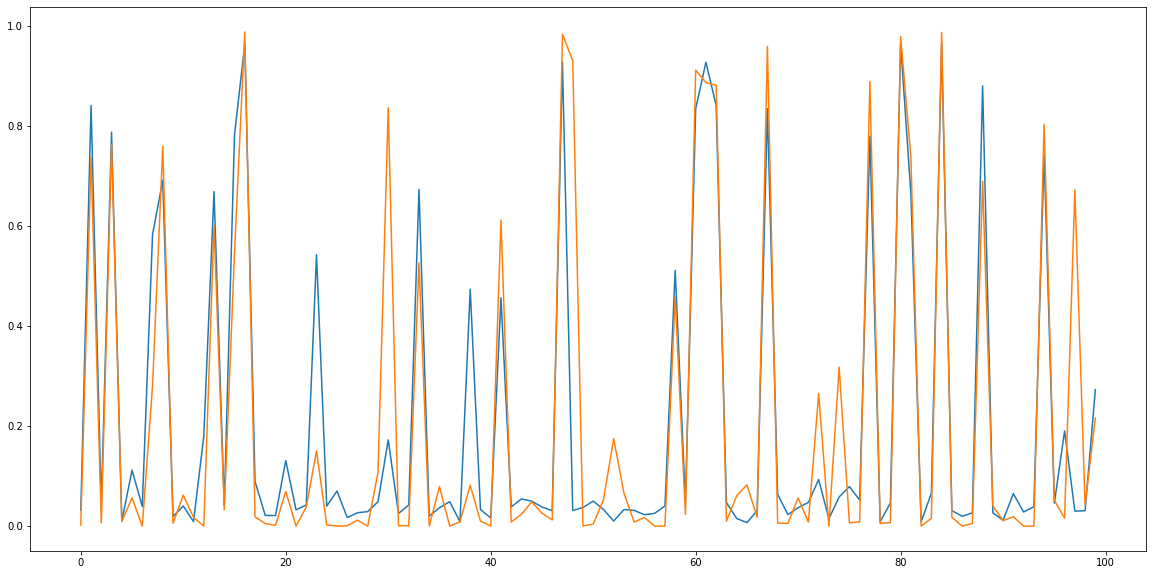

In [10]:
import matplotlib.pyplot as pl

pl.figure(figsize=(20,10))
pl.plot(test_predicted[:100,1])
# pl.plot(test_predicted[:1000,2])
pl.plot(y_test['sad'].values[:100])

In [11]:
test_predicted

array([[0.70525896, 0.03175612, 0.11402822, 0.08483636, 0.06412033],
       [0.01532431, 0.84140738, 0.03159939, 0.03472488, 0.07694403],
       [0.7091473 , 0.04030401, 0.17845385, 0.03340376, 0.03869108],
       ...,
       [0.298297  , 0.17248237, 0.35326742, 0.08709447, 0.08885874],
       [0.04547735, 0.69892321, 0.05296869, 0.07051914, 0.13211162],
       [0.00675401, 0.00897333, 0.9772479 , 0.00108861, 0.00593615]])

<a id="export"></a>
<h3><B><left>- Exporting Model:</left></B></h3>

<a id="save"></a>
<h4><I><left>- save into pickle</left></I></h4>

In [12]:
import pickle
with open('reactions_transformer_without_page_v28.8.pkl','wb') as file:
    pickle.dump(ct,file)
    
import pickle
with open('reactions_model_without_page_v28.8.pkl','wb') as file:
    pickle.dump(model_pipline.get_params()['classifier'],file)

<a id="test"></a>
<h4><I><left>- test final models</left></I></h4>

In [13]:
import pickle

with open('reactions_transformer_with_page.pkl','rb') as file:
    ct_with_page = pickle.load(file)
    
with open('reactions_model_with_page.pkl','rb') as file:
    model = pickle.load(file)

with open('reactions_transformer_without_page.pkl', 'rb') as file:
    ct_without_page = pickle.load(file)
with open('reactions_model_without_page.pkl', 'rb') as file:
    model_without_page = pickle.load(file)

def predict_reactions_with_page(features_set, pages_name):  
    # service start:
    ss = pd.Series()
    df = pd.DataFrame()
    for index, feature_vector in enumerate(features_set):
        for i,feature in enumerate(feature_vector):
            ss[str(i)] = feature
        ss["page_name"] = pages_name[index]
    
        df = df.append(ss,ignore_index=True)
    
    global ct_with_page
    features_vector = ct_with_page.transform(df)
    predicted = model.predict(features_vector)
    return predicted

def predict_reactions_without_page(features_set):  
    # service start:
    ss = pd.Series()
    df = pd.DataFrame()
    for feature_vector in features_set:
        for i,feature in enumerate(feature_vector):
            ss[str(i)] = feature
        df = df.append(ss,ignore_index=True)
    
    global ct_without_page
    features_vector = ct_without_page.transform(df)
    predicted = model_without_page.predict(features_vector)
    return predicted  

In [56]:
df1 = pd.DataFrame(df.loc[0][['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22']]).T
df1['page_name'] = "يوميات قذيفة هاون في دمشق"
# predicted = model_without_page.predict(featues_vector)

In [1]:
# the model input is features vector come from nlp_models(LSTM and BiLstm)
features = [[ 0.0402259603142738, 0.0165141001343727, 0.9114372730255128,
       -0.001352300401777, 0.0205039270222187, 0.0206228233873844,
       0.0621627271175384, 0.0027457359246909, 0.0124617367982864,
       0.9008947014808656, 0.0011122716823592, 0.0084417325306716,
       0.0141683239889381, 0.0157450196891567, 0.0068691600280704,
       0.0080397378568977, 0.007087407246732, 0.0222813333901275,
       0.0083919570374671, 0.0068260526899215, 0.09132621337299,
       0.4444434562865417, 0.366379591505193 ]]
page_name = ["يوميات قذيفة هاون في دمشق"]

# predict_reactions_with_page(features,page_name)

In [16]:
predict_reactions_without_page(features)

E:\Applications\Anaconda\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
E:\Applications\Anaconda\lib\site-packages\sklearn\compose\_column_transformer.py:440: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


array([[ 24.09558803,  12.81954896, 294.97662565,   2.54176715,
          6.94266321]])

<h3><I><center> ...The End...</center></I></h3>